<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);">
<h1 style="padding: 20px; color:#fff; text-align: center;">EXAMEN MACHINE LEARNING</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Detection de faux Billet

</h2>
</div>


<div style="background: linear-gradient(135deg, #e8d5ff 0%, #d4a5ff 100%); text-align: center; border-radius: 10px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
<h2 style="padding: 20px; color:#5a4b8a; text-align: center; margin: 0; font-weight: 300; letter-spacing: 1px;"> ANALYSES GENERALES</h2>
</div>



<div style="border: 2px solid #d4a5ff; border-radius: 8px; text-align: center;">
<h2 style="margin: auto; padding: 20px; color: #5a4b8a;">** Importer les librairies** </h2>
</div>

In [1]:
# ** Importer les librairies**
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import cross_val_score, StratifiedKFold



In [2]:
df = pd.read_csv("billets.csv", sep = ';')

In [7]:
df.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44



<div style="border: 2px solid #d4a5ff; border-radius: 8px; text-align: center;">
<h2 style="margin: auto; padding: 20px; color: #5a4b8a;">** Identifier variable et la nature ** </h2>
</div>

In [5]:
#variables numerique 
numeriques = df.select_dtypes(include=['int64', 'float64']).columns
print("Variables numériques :")
print(numeriques.tolist())

Variables numériques :
['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']


In [8]:
df.dtypes 

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [9]:
df.select_dtypes(include='number').columns


Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [10]:
df.select_dtypes(exclude='number').columns

Index(['is_genuine'], dtype='object')

<div style="background: linear-gradient(135deg, #e8d5ff 0%, #d4a5ff 100%); text-align: center; border-radius: 10px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
<h2 style="padding: 20px; color:#5a4b8a; text-align: center; margin: 0; font-weight: 300; letter-spacing: 1px;"> Nettoyage et préparation des données</h2>
</div>

In [11]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [12]:
pd.isnull(df).sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [13]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


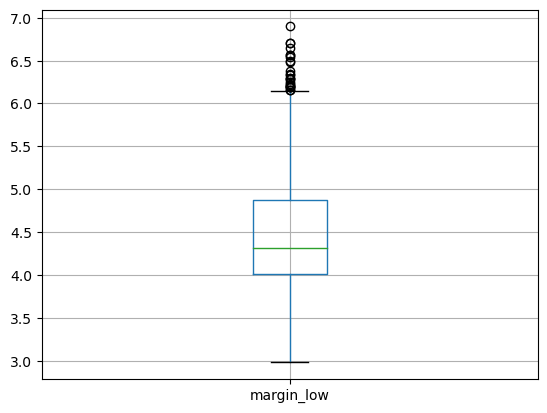

In [14]:
#determinons sis margin low a des outliers ou pas
import matplotlib.pyplot as plt

df.boxplot(column='margin_low')
plt.show()

In [15]:
df["margin_low"] = df["margin_low"].fillna(df["margin_low"].median())


In [16]:
pd.isnull(df).sum()



is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<div style="background: linear-gradient(135deg, #e8d5ff 0%, #d4a5ff 100%); text-align: center; border-radius: 10px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
<h2 style="padding: 20px; color:#5a4b8a; text-align: center; margin: 0; font-weight: 300; letter-spacing: 1px;"> Visualisation</h2>
</div>

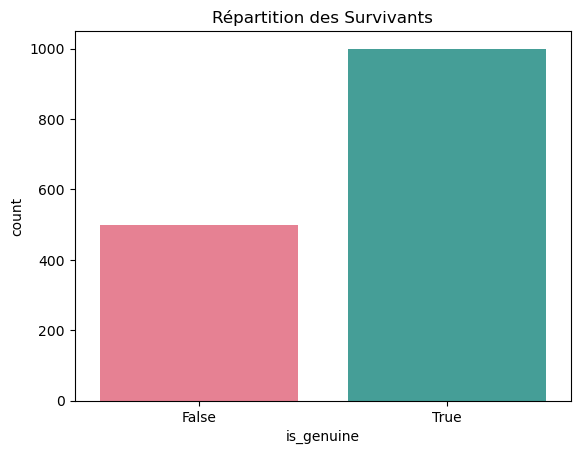

In [17]:
sns.countplot(x="is_genuine", data=df, palette="husl")

plt.title("Répartition des Survivants")

plt.show()



<div style="background: linear-gradient(135deg, #e8d5ff 0%, #d4a5ff 100%); text-align: center; border-radius: 10px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
<h2 style="padding: 20px; color:#5a4b8a; text-align: center; margin: 0; font-weight: 300; letter-spacing: 1px;"> MODELISATION</h2>
</div>


<div style="border: 2px solid #d4a5ff; border-radius: 8px; text-align: center;">
<h2 style="margin: auto; padding: 20px; color: #5a4b8a;">## LogisticRegression ##</h2>
</div>

In [22]:
!pip install imbalanced-learn

     ------------------------------------ 258.3/258.3 kB 220.5 kB/s eta 0:00:00
     ------------------------------------ 308.4/308.4 kB 150.3 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [29]:
X = df.drop(columns=['is_genuine'])
y = df['is_genuine']

In [30]:
# Séparation des données/train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Répartition après SMOTE : {False: 800, True: 800}
Seuil optimal basé sur F1-score : 0.5299033511453578

Classification report :
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Confusion matrix :
 [[ 99   1]
 [  1 199]]


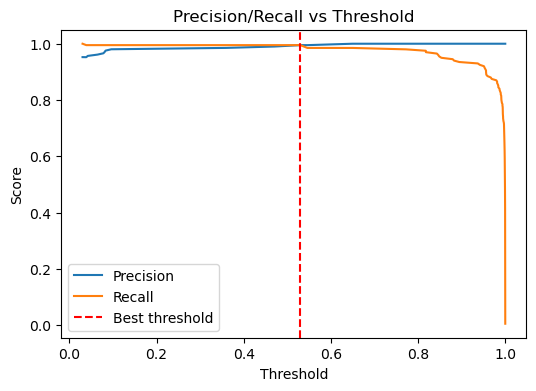

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1️⃣ Split stratifié
# -----------------------------
X_train = X_train.drop(columns=['index_original'], errors='ignore')
X_test = X_test.drop(columns=['index_original'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 2️⃣ Standardisation
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 3️⃣ Appliquer SMOTE si besoin
# -----------------------------
apply_smote = True  # changer à False si tu veux tester sans SMOTE
if apply_smote:
    smote = SMOTE(random_state=42)
    X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
    print("Répartition après SMOTE :", dict(zip(*np.unique(y_train, return_counts=True))))

# -----------------------------
# 4️⃣ Créer et entraîner le modèle
# -----------------------------
model = LogisticRegression(
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# -----------------------------
# 5️⃣ Prédictions probabilités
# -----------------------------
y_proba = model.predict_proba(X_test_scaled)[:,1]  # probabilité classe 1

# -----------------------------
# 6️⃣ Choisir seuil optimal basé sur le max F1-score
# -----------------------------
prec, rec, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (prec * rec) / (prec + rec)
best_thresh = thresholds[np.argmax(f1_scores)]
print("Seuil optimal basé sur F1-score :", best_thresh)

y_pred = (y_proba >= best_thresh).astype(int)

# -----------------------------
# 7️⃣ Évaluation
# -----------------------------
print("\nClassification report :\n", classification_report(y_test, y_pred))
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 8️⃣ Visualiser Precision/Recall vs Threshold
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.axvline(best_thresh, color='red', linestyle='--', label='Best threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision/Recall vs Threshold')
plt.legend()
plt.show()



<div style="border: 2px solid #d4a5ff; border-radius: 8px; text-align: center;">
<h2 style="margin: auto; padding: 20px; color: #5a4b8a;">## K-MEANS ##</h2>
</div>

In [77]:
#Variables indépendantes et dépendantes
X = df.drop(columns=['is_genuine'])
y = df['is_genuine']



In [78]:
# Séparation des données/train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Normalisation # Initialiser/ajuster/transformer
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [90]:

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
clusters = kmeans.predict(X_test_scaled)
# Les clusters peuvent être inversés par rapport aux vrais labels
clusters_adjusted = np.where(clusters == 0, 1, 0)
acc = max(accuracy_score(y_test, clusters), accuracy_score(y_test, clusters_adjusted))
print("Accuracy K-Means:", acc)


Accuracy K-Means: 0.99


<div style="border: 2px solid #d4a5ff; border-radius: 8px; text-align: center;">
<h2 style="margin: auto; padding: 20px; color: #5a4b8a;">## KNN ##</h2>
</div>

In [95]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

paccuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)
accuracy_2dec = round(accuracy, 2)
accuracy_2dec

Précision du modèle : 0.9933333333333333


0.99

<div style="border: 2px solid #d4a5ff; border-radius: 8px; text-align: center;">
<h2 style="margin: auto; padding: 20px; color: #5a4b8a;">## Random-Forest ##</h2>
</div>

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)
accuracy_2dec = round(accuracy, 2)
accuracy_2dec


Précision du modèle : 0.9933333333333333


0.99

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

print("Random Forest - Accuracy moyenne :", np.mean(scores_rf))
print("Random Forest - Scores :", scores_rf)


Random Forest - Accuracy moyenne : 0.9913333333333334
Random Forest - Scores : [0.99666667 0.98666667 0.98666667 0.99666667 0.99      ]


<div style="border: 2px solid #d4a5ff; border-radius: 8px; text-align: center;">
<h2 style="margin: auto; padding: 20px; color: #5a4b8a;">**Comparaison**</h2>
</div>

                  Modèle  Accuracy Moyenne  Écart-type
0  Régression Logistique          0.992000    0.004000
1                    KNN          0.988667    0.004522
2          Random Forest          0.991333    0.004522
3                K-means          0.985333    0.007180


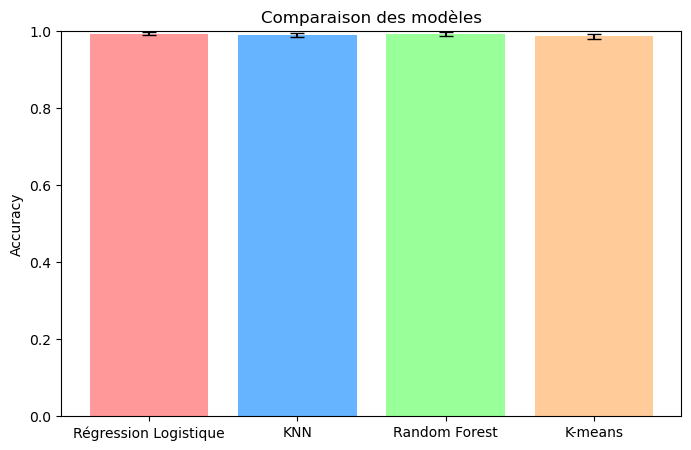

In [105]:
# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Régression Logistique
log_reg = LogisticRegression(max_iter=1000)
scores_log = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring='accuracy')

# 3. KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')

# 4. Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# 5. K-means 

scores_kmeans = []
for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_train)
    clusters = kmeans.predict(X_test)
    
    # Mapping cluster → classe majoritaire
    mapping = {}
    for cluster_id in np.unique(clusters):
        mask = (clusters == cluster_id)
        mapping[cluster_id] = np.bincount(y_test[mask].astype(int)).argmax()
    
    clusters_mapped = np.array([mapping[c] for c in clusters])
    scores_kmeans.append(np.mean(clusters_mapped == y_test))

scores_kmeans = np.array(scores_kmeans)


# 6. Tableau comparatif

results = pd.DataFrame({
    'Modèle': ['Régression Logistique', 'KNN', 'Random Forest', 'K-means'],
    'Accuracy Moyenne': [
        np.mean(scores_log),
        np.mean(scores_knn),
        np.mean(scores_rf),
        np.mean(scores_kmeans)
    ],
    'Écart-type': [
        np.std(scores_log),
        np.std(scores_knn),
        np.std(scores_rf),
        np.std(scores_kmeans)
    ]
})

print(results)


# 7. Visualisation

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.bar(results['Modèle'], results['Accuracy Moyenne'], yerr=results['Écart-type'], capsize=5, color=colors)
plt.ylabel('Accuracy')
plt.title('Comparaison des modèles')
plt.ylim(0, 1)
plt.show()


<div style="background: linear-gradient(135deg, #e8d5ff 0%, #d4a5ff 100%); text-align: center; border-radius: 10px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
<h2 style="padding: 20px; color:#5a4b8a; text-align: center; margin: 0; font-weight: 300; letter-spacing: 1px;"> ENREGISTREMENT DU MODELE</h2>
</div>

pip install joblib

In [107]:

import joblib

# Nom du fichier de sauvegarde
model_filename = 'lg_billet.sav'

# Sauvegarde du pipeline complet (prétraitement + modèle)
joblib.dump(best_pipe, model_filename)

print("Modèle sauvegardé sous :", model_filename)


Modèle sauvegardé sous : lg_billet.sav


In [108]:
# Enregistrez la normalisation
import joblib 
model_scaler={
    'model': best_pipe,
    'scaler': scaler}
scaler_filename = 'lg_billet_scaler_25_08_2025.sav'

# Sauvegarde avec joblib
joblib.dump(model_scaler, scaler_filename)

['lg_billet_scaler_25_08_2025.sav']

In [109]:
df = pd.read_csv('billets.csv', sep=';')

In [110]:
# Garder uniquement les colonnes nécessaires pour l'API
expected_columns = ['diagonal','height_left','height_right','margin_low','margin_up','length']
df_features = df[expected_columns]

# Sauvegarder
df_features.to_csv("billets_production.csv", index=False)
print("CSV prêt pour l'API : billets_production.csv")


CSV prêt pour l'API : billets_production.csv


In [111]:
df_compare = pd.DataFrame({
    'b_reel': y_test.values,
    'b_pred': y_pred
})

df_compare.head(1500)

,b_reel,b_pred
0,True,False
1,True,False
2,True,True
3,True,True
4,True,True
...,...,...
295,False,True
296,False,True
297,False,False
298,False,False


In [112]:
print(df.columns.tolist())

['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']


In [32]:
import joblib 
model_filename= 'lr_billet.sav'

joblib.dump(model,model_filename)
import joblib 
model_scaler={
    'model': model,
    'scaler': scaler}
scaler_filename = 'lr_billet_scaler_29_08_2025.sav'

In [33]:
# Sauvegarde avec joblib
joblib.dump(model_scaler, scaler_filename)

['lr_billet_scaler_29_08_2025.sav']

In [34]:
import joblib

# Test avec lr_billet.sav
try:
    model_only = joblib.load("lr_billet.sav")
    print("lr_billet.sav contient :", type(model_only))
except Exception as e:
    print("Erreur lecture lr_billet.sav :", e)

# Test avec lr_billet_scaler_29_08_2025.sav
try:
    model_scaler = joblib.load("lr_billet_scaler_29_08_2025.sav")
    print("lr_billet_scaler_29_08_2025.sav contient :", model_scaler.keys())
except Exception as e:
    print("Erreur lecture lr_billet_scaler_29_08_2025.sav :", e)


lr_billet.sav contient : <class 'sklearn.linear_model._logistic.LogisticRegression'>
lr_billet_scaler_29_08_2025.sav contient : dict_keys(['model', 'scaler'])
